## 4.1 使用决策树实现基本的分裂

In [6]:
# 生成准备的分类数据
import numpy as np 
from sklearn import datasets
X,y = datasets.make_classification(n_samples=1000,n_features=3,n_redundant=0)

from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X,y)
preds = dt.predict(X)

n_features=200
X,y = datasets.make_classification(750,n_features,n_informative=5)

training = np.random.choice([True,False],p=[.75,.25],size=len(y))
testing = ~training
accuracies = []

# 使用不同深度的决策树，看accuracies变化
for x in np.arange(1,n_features+1):
    dt = DecisionTreeClassifier(max_depth=x)
    dt.fit(X[training],y[training])
    preds = dt.predict(X[testing])
    accuracies.append((preds==y[testing]).mean())


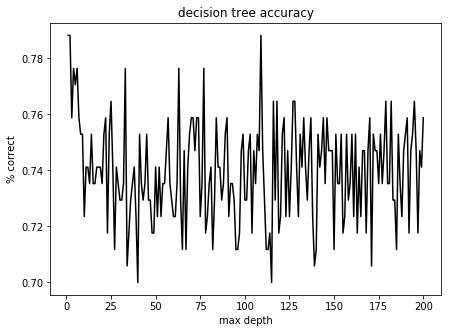

In [8]:
# 绘制结果图像
import matplotlib.pyplot as plt 
fig,ax = plt.subplots(figsize=(7,5))
ax.plot(range(1,n_features+1),accuracies,color='k')
ax.set_title("decision tree accuracy")
ax.set_ylabel("% correct")
ax.set_xlabel("max depth")
plt.show()

Text(0.5, 0, 'max depth')

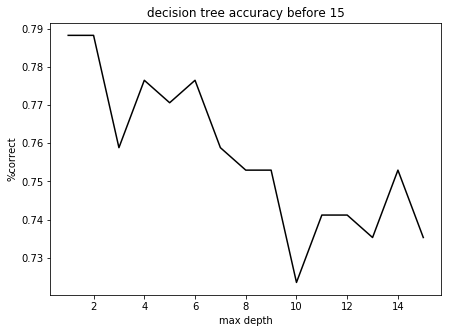

In [10]:
N = 15
fig,ax = plt.subplots(figsize=(7,5))
ax.plot(range(1,n_features+1)[:N],accuracies[:N],color='k')
ax.set_title("decision tree accuracy before 15")
ax.set_ylabel("%correct")
ax.set_xlabel("max depth")

## 4.2 调整决策树模型

In [21]:
from sklearn import datasets 
from sklearn.tree import DecisionTreeClassifier
import numpy as np

X, y = datasets.make_classification(1000, 20, n_informative=3)
training = np.random.choice([True,False],p=[.75,.25],size=len(y))
testing = ~training

dt1 = DecisionTreeClassifier() .fit(X[training], y[training])
pred1 = dt1.predict(X[testing])
ac1 = (pred1!=y[testing]).sum(axis=0)

# 限定最大深度，防止过拟合
dt2 = DecisionTreeClassifier(max_depth=5).fit(X[training],y[training])
pred2 = dt1.predict(X[testing])
ac2 = (pred2!=y[testing]).sum(axis=0)
# dt.get_n_leaves()

# 限定划分信息数的方法是为entropy。和最大的叶节点，防止出现过拟合
dt3 = DecisionTreeClassifier(min_samples_leaf=10,criterion='entropy',max_depth=5).fit(X[training],y[training])
pred3 = dt3.predict(X[testing])
ac3 = (pred3!=y[testing]).sum(axis=0)

print(ac1,ac2,ac3)
# pydot的接口已经变了
# from io import StringIO
# from sklearn import tree
# import pydot
# str_buffer = StringIO()
# tree.export_graphviz(dt,out_file=str_buffer)
# graph = pydot.graph_from_dot_data(str_buffer.getvalue())
# help(pydot)

32 32 20


## 4.3 随机森林

983
            0         1  correct
0    0.592287  0.407713    False
1    0.393026  0.606974     True
2    0.635692  0.364308     True
3    0.011071  0.988929     True
4    0.000406  0.999594     True
..        ...       ...      ...
995  0.842913  0.157087     True
996  0.814767  0.185233     True
997  0.953311  0.046689     True
998  0.939430  0.060570     True
999  0.896015  0.103985     True

[1000 rows x 3 columns]


<AxesSubplot:xlabel='correct'>

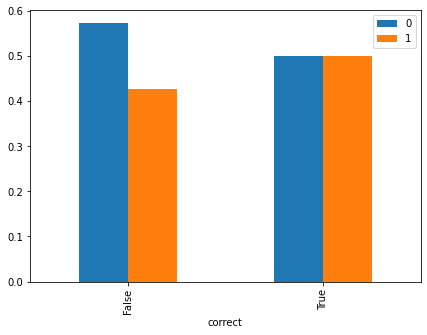

In [4]:
# 创建分类数据
from sklearn import datasets 
X,y = datasets.make_classification(1000)

# 创建分类器对象
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=9)
rf.fit(X,y)
print((y==rf.predict(X)).sum())

# 理解每个预测的不确定性但是并不会绘图pd没学过
probs = rf.predict_proba(X)
import pandas as pd 

# 创建pd表单，用来做统计学的处理
probs_df = pd.DataFrame(probs,columns=['0','1'])
probs_df['correct'] = rf.predict(X)==y
# np_df = probs_df.to_numpy()
print(probs_df)
# print(np_df)

import matplotlib.pyplot as plt
f,ax = plt.subplots(figsize=(7,5))

# 源代码执行不了。自己对dp也不熟悉。所以只能画一个这个了
probs_df.groupby('correct').mean().plot(kind='bar',ax=ax)



## 4.4 调整随机森林模型

In [10]:
# 创建数据集
from sklearn import datasets
X,y = datasets.make_classification(n_samples=10000,n_features=20,n_informative=15,flip_y=.5,weights=[.2,.8])

# 创建训练集的bool屏蔽
import numpy as np 
training = np.random.choice([True,False],p=[.8,.2],size=y.shape)
testing =~training

# 创建随机森林的分类器
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X[training],y[training])
preds = rf.predict(X[testing])
print((preds == y[testing]).mean())
# 0.729

# 迭代max_features 选项查看变化 .分类中用到features多少
from sklearn.metrics import confusion_matrix
max_feature_parms = ['auto','sqrt','log2',.01,.5,.99]
confusion_matrixes = {}

for max_feature in max_feature_parms:
    rf = RandomForestClassifier(max_features=max_feature)
    rf.fit(X[training],y[training])
confusion_matrixes[max_feature] =confusion_matrix(y[testing])
rf.predict(X[testing]).ravel()

0.7295373665480427


TypeError: confusion_matrix() missing 1 required positional argument: 'y_pred'

In [15]:
# 可视化,显然已经运行不聊了
# import pandas as pd 
# confusion_df = pd.DataFrame(confusion_matrixes)

# import itertools
# from matplotlib import pyplot as plt 
# f,ax = plt.subplots(figsize=(7,5))
# confusion_df.plot(kind = 'bar',ax=ax)

# ax.legend(loc='best')
# ax.set_title("Guessed vs Correct")
# ax.grid()

# ax.set_xticklabels([str((i,j))for i,j in list(iteratools.product(range(2),range(2)))])
# ax.set_xlabel("gussed vs correct")
# ax.set_ylabel("correct")

## 4.5 使用支持向量机对数据分类

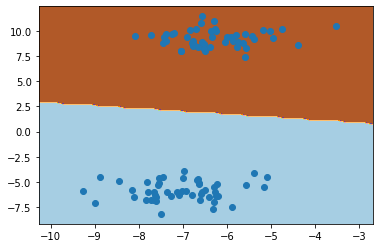

In [30]:
# 使用默认的支持向量机
from sklearn import datasets
X,y = datasets.make_classification()
from sklearn.svm import SVC

base_svm = SVC()
base_svm.fit(X,y)

# 使用线性核函数的支持向量机
X,y = datasets.make_blobs(n_features=2,centers=2)
from sklearn.svm import LinearSVC

svm = LinearSVC()
svm.fit(X,y)

import numpy as np 
import matplotlib.pyplot as plt 

plot_step =0.2
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),np.arange(y_min, y_max, plot_step))

Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

clr = ['r','g','b']
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.scatter(X[:,0],X[:,1],cmap='r')

## 4.6 使用多分类来归纳

In [45]:
# 生成数据集
from sklearn import datasets
X,y = datasets.make_classification(n_samples=10000,n_classes=3,n_informative=3)

# 分割数据集
import numpy as np 
training = np.random.choice([True,False],p=[0.9,0.1],size=y.shape)
testing = ~training
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X[training],y[training])
re = dt.predict(X[testing])
# 输出测试集的准确率
print((re==y[testing]).mean())
# 0.85
print(dt.get_depth())

0.8208092485549133
20


In [49]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression

# 使用两个逻辑回归分类器构建了一个多分类分类器
mlr = OneVsRestClassifier(LogisticRegression(),n_jobs=2)
mlr.fit(X[training],y[training])
re = mlr.predict(X[testing])
print((re==y[testing]).mean())

0.7784200385356455


## 4.7 将LDA用于分类

## 4.8 使用QDA-非线性LDA

## 4.9 使用随机梯度下降来分类

In [53]:
from sklearn import datasets
X,y = datasets.make_classification()


# 分割数据集
import numpy as np 
training = np.random.choice([True,False],p=[0.9,0.1],size=y.shape)
testing = ~training

from sklearn import linear_model
sgd_clf = linear_model.SGDClassifier()

sgd_clf.fit(X[training],y[training])
result = sgd_clf.predict(X[testing])
print((result==y[testing]).mean())

0.8888888888888888


## 4.10 使用朴素贝叶斯分类

In [68]:
# 导入数据
from sklearn import datasets 

categories = ["rec.autos","rec.motorcycles"]
new_groups = datasets.fetch_20newsgroups(categories=categories)

# print("\n".join(new_groups.data[:1]))
print(new_groups.target.shape)
X,y = new_groups.data,new_groups.target

# 分割数据集
import numpy as np 
training = np.random.choice([True,False],p=[0.9,0.1],size=y.shape)
testing = ~training

(1192,)


In [72]:
# 使用朴素贝叶斯进行分类。
# 使用onehot编码
from sklearn.feature_extraction.text import CountVectorizer
count_vec = CountVectorizer()
bow = count_vec.fit_transform(new_groups.data)

# 将矩阵转换为密集数组
bow = np.array(bow.todense())

words = np.array(count_vec.get_feature_names())
words[bow[0]>0][:5]

# 朴素贝叶斯
from sklearn import naive_bayes
clf = naive_bayes.GaussianNB()

mask = np.random.choice([True,False],len(bow))
clf.fit(bow[training],new_groups.target[training])
predictions = clf.predict(bow[testing])
print((predictions == new_groups.target[testing]).mean())

0.9495798319327731


## 4.11 标签传递算法。半监督学习

In [80]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data.copy()
y = iris.target.copy()
names = iris.target_names.copy()
print(names)

# bool屏蔽
y[np.random.choice([True,False],p=[0.3,0.7],size =len(y))]=-1
# y[:10]

# 标签传递算法
from sklearn import semi_supervised
lp = semi_supervised.LabelPropagation()
lp.fit(X,y)

preds = lp.predict(X)
print((preds == iris.target).mean())

# 标签扩充算法
ls = semi_supervised.LabelSpreading()
ls.fit(X,y)
print((ls.predict(X)==iris.target).mean())

['setosa' 'versicolor' 'virginica']


0.98